In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import inspect, create_engine, func, text

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine)

In [15]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [16]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.

## First get all the column names and types from each table
## Station table
inspector = inspect(engine)
columns = inspector.get_columns('Station')
print("Station")
for column in columns:
    print(column['name'], column['type'])



## Measurement table
columns_2 = inspector.get_columns('Measurement')
print('\n') ## New line to separate columns of each table (https://www.freecodecamp.org/news/print-newline-in-python/)
print("Measurement")
for column_2 in columns_2:
    print(column_2['name'], column_2['type'])

    
    
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

Station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


Measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


('2017-08-23',)

In [23]:
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

most_recent_date_str = most_recent_date[0] ## Since the first element is a 'Row', we need to extract the string
most_recent_date_str

'2017-08-23'

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

date_format = '%Y-%m-%d' ## For method used to convert a string to a datetime object: used for parameter that indicates which
                         ## part of the string represents what in the date and time (Code from https://www.datacamp.com/tutorial/converting-strings-datetime-objects)

    
# Starting from the most recent data point in the database. 
# Query the data for the first date if the dates were arranged in descending order (Greatest is the most recent)
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

most_recent_date_str = most_recent_date[0] ## Since the first element is a 'Row', we need to extract the string

most_recent_date = dt.datetime.strptime(most_recent_date_str, date_format) ## Convert the string to a date object (striptime method gotten from https://www.datacamp.com/tutorial/converting-strings-datetime-objects)

# Calculate the date one year from the last date in data set.
one_year_date = most_recent_date - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
data_and_prec_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_date).filter(Measurement.date < most_recent_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_and_prec_df = pd.DataFrame(data_and_prec_data, columns = ["Date", "Precipitation"])
data_and_prec_df.head()

# Sort the dataframe by date
data_and_prec_df = data_and_prec_df.sort_values("Date") ## https://www.datacamp.com/tutorial/pandas-sort-values?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720830&utm_adgroupid=157156377311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=705187010576&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9032183&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-us_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-july24&gad_source=1&gclid=EAIaIQobChMI7qH849nZhwMVaRStBh1WRwdoEAAYASAAEgK-7vD_BwE


# Create another column in dataframe to keep track of which entries with the same date come first 
time_order = np.arange(0, len(data_and_prec_df), 1)
data_and_prec_df["New Index"] = time_order
data_and_prec_df = data_and_prec_df[["New Index", "Date", "Precipitation"]]
data_and_prec_df.head()






,New Index,Date,Precipitation
0,0,2016-08-23,0.00
1009,1,2016-08-23,NaN
1529,2,2016-08-23,1.79
704,3,2016-08-23,0.05
361,4,2016-08-23,0.15


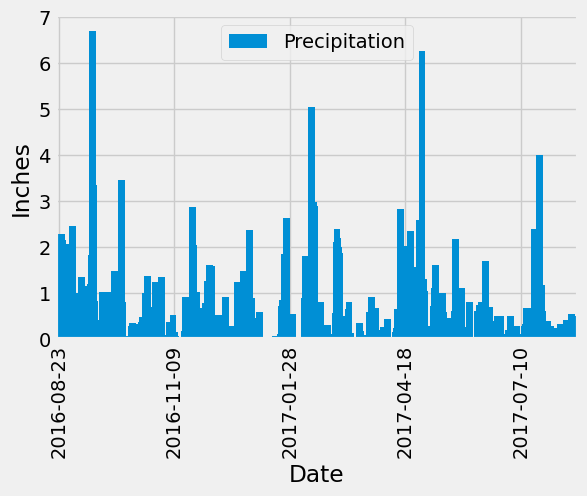

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data

data_and_prec_df2 = pd.DataFrame(data_and_prec_df[["Date", "Precipitation"]])
data_and_prec_df2.plot(kind='bar', figsize=(6,4), width=30)


## Figure out when were the dates, 2016-08-23 (tick 1), 2016-11-09 (tick 2), 2017-01-28 (tick 3), 2017-04-18 (tick 4), 2017-07-10 (tick 5) relative to rest of the data
tick_1 = data_and_prec_df.loc[data_and_prec_df["Date"] == '2016-08-23'] ## All values in dataframe that have dates of 2016-08-23
tick_1_mark = tick_1.loc[tick_1["New Index"] == tick_1["New Index"].min()]["New Index"].values[0]

## Earliest time of entries with dates of 2016-08-23
tick_2 = data_and_prec_df.loc[data_and_prec_df["Date"] == '2016-11-09']
tick_2_mark = tick_2.loc[tick_2["New Index"] == tick_2["New Index"].min()]["New Index"].values[0]

tick_3 = data_and_prec_df.loc[data_and_prec_df["Date"] == '2017-01-28']
tick_3_mark = tick_3.loc[tick_3["New Index"] == tick_3["New Index"].min()]["New Index"].values[0]


tick_4 = data_and_prec_df.loc[data_and_prec_df["Date"] == '2017-04-18']
tick_4_mark = tick_4.loc[tick_4["New Index"] == tick_4["New Index"].min()]["New Index"].values[0]

tick_5 = data_and_prec_df.loc[data_and_prec_df["Date"] == '2017-07-10']
tick_5_mark = tick_5.loc[tick_5["New Index"] == tick_5["New Index"].min()]["New Index"].values[0]


plt.xticks([tick_1_mark, tick_2_mark, tick_3_mark, tick_4_mark, tick_5_mark], ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'])
plt.xlabel("Date") ## x-axis label
plt.ylabel("Inches") ## y-axis label
plt.show()

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_and_prec_df2.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).where(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

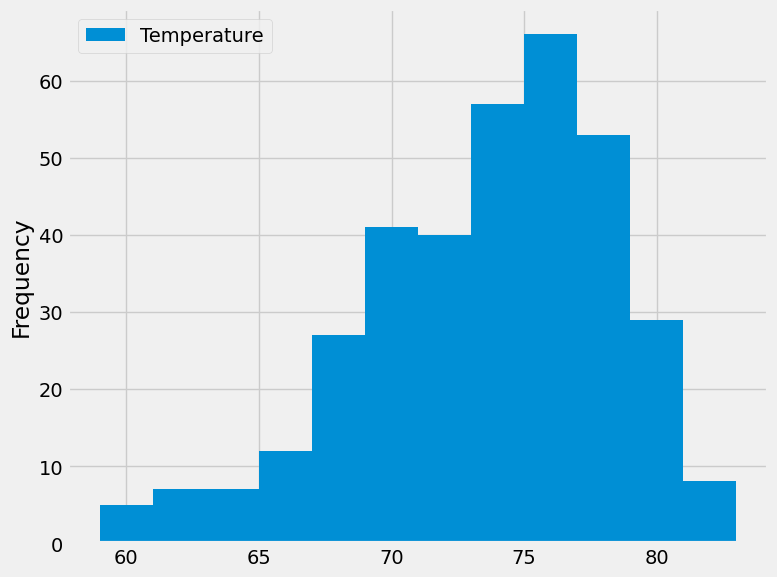

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.tobs).where(Measurement.date > one_year_date).where(Measurement.date < most_recent_date).where(Measurement.station == 'USC00519281').all()
temp_data_df = pd.DataFrame(temp_data, columns=["Temperature"])
temp_data_df.plot(kind='hist', figsize=(8,6), bins=12)
plt.yticks(np.arange(0,70,10))
plt.tight_layout()
plt.show()

# Close Session

In [33]:
# Close Session
session.close()